In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


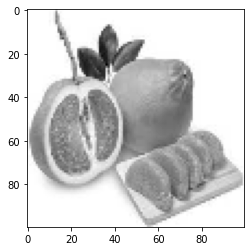

In [ ]:
datadir = "/content/drive/MyDrive/trai cay datasets"
categories=['bưởi','chuối','cam','dưa hấu','măng cụt','lựu','nho','sầu riêng','táo','thơm']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 30/30 [00:08<00:00,  3.35it/s]

295


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (295, 100, 100, 1)
y (295,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/trai cay datasets/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/trai cay datasets/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/trai cay datasets/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/trai cay datasets/Save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (295, 100, 100, 1)
y (295,)


In [ ]:
y= to_categorical(y,10)

In [ ]:
y.shape

(295, 10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=295,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/295
4/4 [==============================] - 1s 208ms/step - loss: 9.6110e-06 - accuracy: 1.0000 - val_loss: 46.1887 - val_accuracy: 0.0000e+00
Epoch 2/295
4/4 [==============================] - 0s 128ms/step - loss: 9.5994e-06 - accuracy: 1.0000 - val_loss: 46.1941 - val_accuracy: 0.0000e+00
Epoch 3/295
4/4 [==============================] - 0s 126ms/step - loss: 9.5817e-06 - accuracy: 1.0000 - val_loss: 46.2011 - val_accuracy: 0.0000e+00
Epoch 4/295
4/4 [==============================] - 0s 127ms/step - loss: 9.5559e-06 - accuracy: 1.0000 - val_loss: 46.2096 - val_accuracy: 0.0000e+00
Epoch 5/295
4/4 [==============================] - 0s 125ms/step - loss: 9.5312e-06 - accuracy: 1.0000 - val_loss: 46.2192 - val_accuracy: 0.0000e+00
Epoch 6/295
4/4 [==============================] - 1s 133ms/step - loss: 9.5014e-06 - accuracy: 1.0000 - val_loss: 46.2294 - val_accuracy: 0.0000e+00
Epoch 7/295
4/4 [==============================] - 0s 123ms/step - loss: 9.4711e-06 - accuracy: 1.00

In [ ]:
model.save('traicay.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'bưởi',  1: 'chuối',2: 'măng cụt',3: 'cam',4: 'dưa hấu',5: 'táo',6: 'thơm',7: 'sầu riêng',8: 'nho',9: 'lựu'}
model = load_model('traicay.h5')

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation chuối


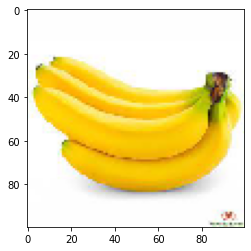

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/chuối/chuối (13).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation măng cụt


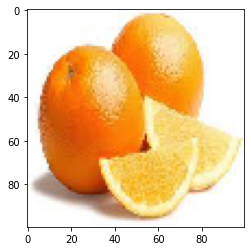

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/cam/cam (14).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1.7207315e-26 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
expectation sầu riêng


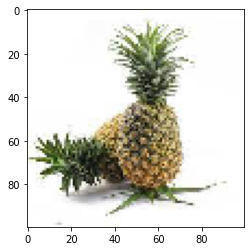

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/thơm/dứa  (12).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation sầu riêng


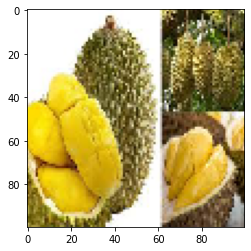

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/sầu riêng/sầu riêng (21).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation dưa hấu


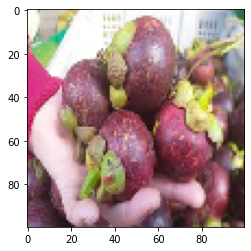

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/măng cụt/măng cụt (23).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation cam


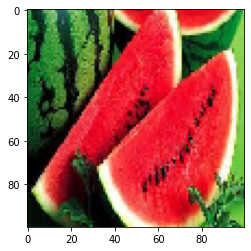

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/trai cay datasets/dưa hấu/dưa hấu (30).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])